## Sistemas de Recomendación<a class="tocSkip">
  ## EL460 ELECTIVA I - CIENCIA DE DATOS II <a class="tocSkip">
  ### Ingenieria Electrónica <a class="tocSkip">
  ### Universidad Popular del Cesar <a class="tocSkip">
  ### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [1]:
!pip install currencyconverter

     |████████████████████████████████| 512 kB 422 kB/s 
  Created wheel for currencyconverter: filename=CurrencyConverter-0.14.4-py3-none-any.whl size=514211 sha256=f5cc4f8458821285fc825294f2b69a221bc5ce765331662f08e7c48c2083c305
  Stored in directory: /root/.cache/pip/wheels/cc/7e/4e/e60bc4a6dda14911d0ee70284de5f1d9dd3b6dfceef895903a
Successfully built currencyconverter


In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from currency_converter import CurrencyConverter
import datetime
from wordcloud import WordCloud, STOPWORDS 
import textwrap
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data_imdb_movies = pd.read_csv('../input/imdb-extensive-dataset/IMDb movies.csv')
data_imdb_names = pd.read_csv('../input/imdb-extensive-dataset/IMDb names.csv')
data_imdb_title_principals = pd.read_csv('../input/imdb-extensive-dataset/IMDb title_principals.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
imdb_movies = data_imdb_movies.copy()
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [5]:
imdb_names = data_imdb_names.copy()
imdb_names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [6]:
imdb_title_principals = data_imdb_title_principals.copy()
imdb_title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [7]:
print(imdb_movies.info())
print('\n')
print(imdb_names.info())
print('\n')
print(imdb_title_principals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

# Data Preprocessing & Exploratory Data Analysis

In [8]:
# Merge name to title principals
imdb_title_principals = pd.merge(imdb_title_principals, imdb_names[['imdb_name_id', 'name']], 
                                 left_on = ['imdb_name_id'], right_on = ['imdb_name_id']) 
# Ordering columns
imdb_title_principals = imdb_title_principals[['imdb_title_id', 'ordering', 'imdb_name_id', 'name', 'category', 'job', 'characters']]
imdb_title_principals.head()

,imdb_title_id,ordering,imdb_name_id,name,category,job,characters
0,tt0000009,1,nm0063086,Blanche Bayliss,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,William Courtenay,actor,NaN,"[""Mr. Hamilton""]"
2,tt0020403,2,nm0183823,William Courtenay,actor,NaN,"[""The Minister - Guillotine Sequence""]"
3,tt0000009,3,nm1309758,Chauncey Depew,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
4,tt0000009,4,nm0085156,Alexander Black,director,NaN,NaN


In [9]:
# Create new column "cinematographer" into imdb_movies data
cinematographer_name = imdb_title_principals[imdb_title_principals['category']=='cinematographer'].reset_index()
cinematographer_name.rename(columns={'name' : 'cinematographer'}, inplace = True)
imdb_movies = pd.merge(imdb_movies, cinematographer_name[['imdb_title_id', 'cinematographer']],
                       left_on = 'imdb_title_id', right_on = 'imdb_title_id', how = 'left')

# Group/join cinematographer names with same imdb_title_id to avoid duplicated data (from merging imdb_movies and cinematographer_name)
duplicated_data = imdb_movies[imdb_movies['imdb_title_id'].duplicated(keep = False)]
multiple_names_cinematographer = duplicated_data.groupby('imdb_title_id')['cinematographer'].apply(', '.join).reset_index()
duplicated_data.drop(['cinematographer'], axis = 1, inplace = True)
duplicated_data.drop_duplicates(subset=['imdb_title_id'], inplace = True)
data_multiple_names = pd.merge(duplicated_data, multiple_names_cinematographer[['imdb_title_id', 'cinematographer']], 
                               left_on = 'imdb_title_id', right_on = 'imdb_title_id')
data_multiple_names[['imdb_title_id', 'cinematographer']].head()

,imdb_title_id,cinematographer
0,tt0001892,"Adam Johansen, Guido Seeber"
1,tt0002423,"Theodor Sparkuhl, Kurt Waschneck"
2,tt0002445,"Eugenio Bava, Alessandro Bona"
3,tt0003131,"Jacques Bizeul, Paul Flon"
4,tt0003165,"Georges Guérin, Albert Sorgius"


In [10]:
# Drop and replace duplicate data (because names of cinematographer) with data which have multiple names of cinematographer
imdb_movies.drop_duplicates(subset=['imdb_title_id'], keep = False, inplace = True)
imdb_movies = pd.concat((imdb_movies, data_multiple_names), sort = False).sort_values('imdb_title_id')

# Reorder column cinematographer
cols = imdb_movies.columns.tolist()
cols = cols[0:13] + cols[-1:] + cols [13:-1]
imdb_movies = imdb_movies[cols]
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,cinematographer,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,Orrie Perry,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Adam Johansen, Guido Seeber",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
4,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,NaN,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
5,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Emilio Roncarolo,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [11]:
# Filtering data (only USA or Hollywood Movies)
imdb_movies['country'].fillna('', inplace = True)
imdb_movies = imdb_movies[imdb_movies['country'].str.contains('USA')]

In [12]:
# Create budget_currency column and formatting budget column into numeric values for converting to usd
imdb_movies['budget_currency'] = imdb_movies['budget'].str.split(' ', expand = True)[0]
imdb_movies['budget_currency'] = imdb_movies['budget_currency'].str.replace('$', 'USD')
imdb_movies['budget'] = imdb_movies['budget'].str.split(' ', expand = True)[1]
imdb_movies['budget'] = pd.to_numeric(imdb_movies['budget'], errors='coerce')

# Create worlwide_gross_income_currency column and formatting worlwide_gross_income column into numeric values for converting to usd
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['worlwide_gross_income'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['worlwide_gross_income'] = pd.to_numeric(imdb_movies['worlwide_gross_income'], errors='coerce')

# Create usa_gross_income_currency column and formatting usa_gross_income column into numeric values for converting to usd
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['usa_gross_income'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['usa_gross_income'] = pd.to_numeric(imdb_movies['usa_gross_income'], errors='coerce')


In [13]:
# Convert currencies into USD

c = CurrencyConverter()
for i in range(imdb_movies.shape[0]):
    # budget column
    if (imdb_movies['budget_currency'].iloc[i] in c.currencies):
        imdb_movies['budget'].iloc[i] = c.convert(imdb_movies['budget'].iloc[i], imdb_movies['budget_currency'].iloc[i], 'USD')
    else :
        imdb_movies['budget'].iloc[i] = np.nan
   
    # worlwide_gross_income column   
    if (imdb_movies['worlwide_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['worlwide_gross_income'].iloc[i] = c.convert(imdb_movies['worlwide_gross_income'].iloc[i], 
                                                            imdb_movies['worlwide_gross_income_currency'].iloc[i], 'USD', )
    else :
        imdb_movies['worlwide_gross_income'].iloc[i] = np.nan
    
    # usa_gross_income column   
    if (imdb_movies['usa_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['usa_gross_income'].iloc[i] = c.convert(imdb_movies['usa_gross_income'].iloc[i], 
                                                       imdb_movies['usa_gross_income_currency'].iloc[i], 'USD', 
                                                       )
    else :
        imdb_movies['usa_gross_income'].iloc[i] = np.nan


## Analysis Numeric and Categorical Data

### Analysis Numeric Data

In [14]:
num_data = ['duration', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 
            'metascore', 'reviews_from_users', 'reviews_from_critics']
imdb_movies[num_data].describe()

,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,34325.000000,34325.000000,3.432500e+04,1.361000e+04,1.058700e+04,1.134000e+04,9508.000000,33931.000000,32250.000000
mean,94.605273,5.609413,1.999168e+04,1.616476e+07,2.745402e+07,5.234298e+07,53.079617,82.781203,41.832031
std,18.796947,1.273202,8.161522e+04,3.125879e+07,5.607265e+07,1.389903e+08,17.807689,252.584710,78.525503
min,42.000000,1.100000,9.900000e+01,0.000000e+00,3.000000e+01,1.600000e+01,1.000000,1.000000,1.000000
25%,85.000000,4.800000,2.520000e+02,6.700000e+05,2.813985e+05,2.228240e+05,40.000000,8.000000,4.000000
50%,92.000000,5.800000,7.380000e+02,3.341750e+06,6.014341e+06,5.779699e+06,53.000000,19.000000,12.000000
75%,102.000000,6.500000,4.561000e+03,1.800000e+07,3.072612e+07,3.915875e+07,66.000000,54.000000,39.000000
max,398.000000,9.700000,2.278845e+06,3.560000e+08,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


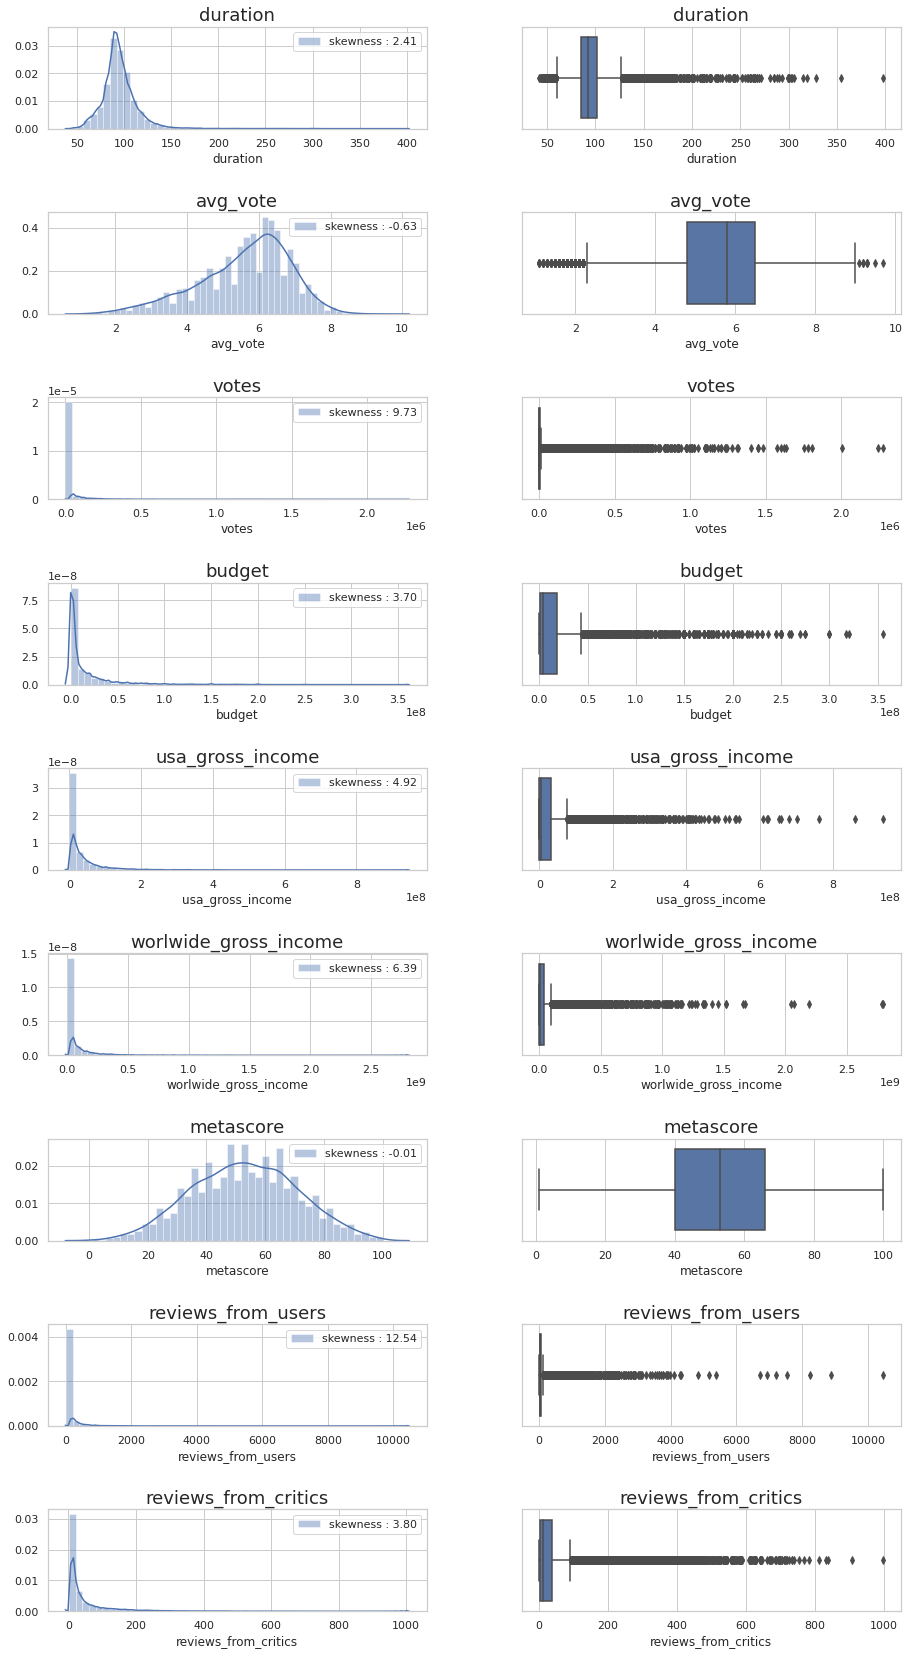

In [15]:
# Visualize distplot and boxplot on each numerical data/columns

fig, ax = plt.subplots(9, 2, figsize = (14, 24))
fig.tight_layout(pad = 5)

for i, n in enumerate(num_data):
    sns.distplot(ax = ax[i,0], a = imdb_movies[n].dropna(), label = 'skewness : %.2f'%(imdb_movies[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = imdb_movies[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

### Analysis Categorical Data

#### Which Decade Has Release Most Movies and Highest Average Vote (Rating)

In [16]:
# Clean the data on 'year' column
imdb_movies['year'].replace('TV Movie 2019', 2019, inplace = True)
imdb_movies['year'] = imdb_movies['year'].astype(int)

# Group the data based on Decades
movies_by_decades = imdb_movies[['imdb_title_id', 'original_title', 'year','avg_vote', 'votes']]
decades = movies_by_decades['year']//10*10
decades = decades.astype(str)+' - '+ (decades+9).astype(str)
decades_column = pd.DataFrame(decades)
movies_by_decades.insert(3, 'decades', decades_column)
movies_by_decades.head()

,imdb_title_id,original_title,year,decades,avg_vote,votes
0,tt0000009,Miss Jerry,1894,1890 - 1899,5.9,154
4,tt0002101,Cleopatra,1912,1910 - 1919,5.2,446
6,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1910 - 1919,5.7,484
12,tt0002461,Richard III,1912,1910 - 1919,5.5,225
22,tt0003167,"Home, Sweet Home",1914,1910 - 1919,5.8,187


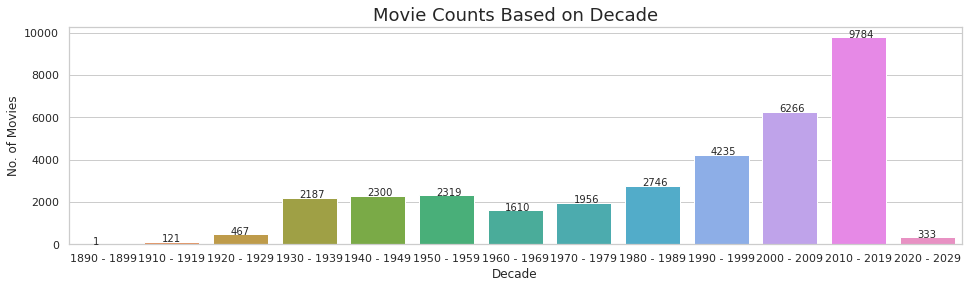

In [17]:
# Visualize movie counts release based on decade with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['imdb_title_id'].count().index
count = movies_by_decades.groupby('decades')['imdb_title_id'].count()
sns.barplot(ax = ax, x = decades, y = count)
ax.set_title('Movie Counts Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,count in enumerate(count.astype(int)):
       ax.text(x=index-0.15 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
plt.show()

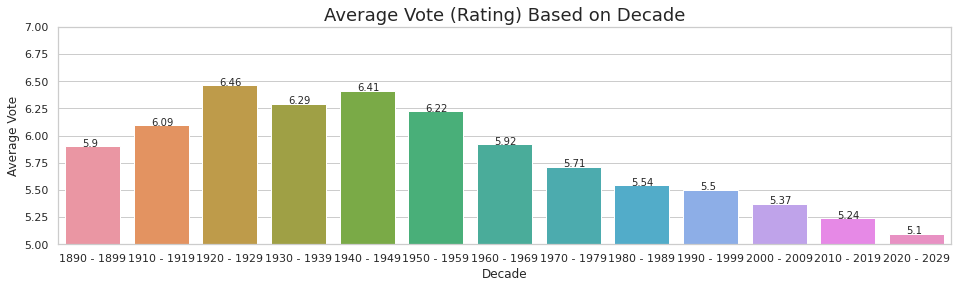

In [18]:
# Visualize average vote (rating) based on decade with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['avg_vote'].mean().index
avg_vote = movies_by_decades.groupby('decades')['avg_vote'].mean()
sns.barplot(ax = ax, x = decades, y = avg_vote)
ax.set_title('Average Vote (Rating) Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,avg_vote in enumerate(np.round(avg_vote, 2)):
       ax.text(x=index-0.15 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim((5, 7))

plt.show()

#### Which Month Has Release Most Movies

In [19]:
# Preprocess the data 

imdb_movies['date_published'].replace('TV Movie 2019', 2019, inplace = True)
movies_published = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'date_published']]
movies_published['month_published'] = [month[5:7] for month in movies_published['date_published'].astype(str)]

#print(movies_published['month_published'].unique()) # There are blank values on month_published column
movies_published['month_published'][movies_published['month_published']==''] = np.nan # replace blank values with nan
movies_published.head()

,imdb_title_id,original_title,genre,date_published,month_published
0,tt0000009,Miss Jerry,Romance,1894-10-09,10
4,tt0002101,Cleopatra,"Drama, History",1912-11-13,11
6,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","Biography, Drama",1913,NaN
12,tt0002461,Richard III,Drama,1912-10-15,10
22,tt0003167,"Home, Sweet Home",Drama,1914-05-17,05


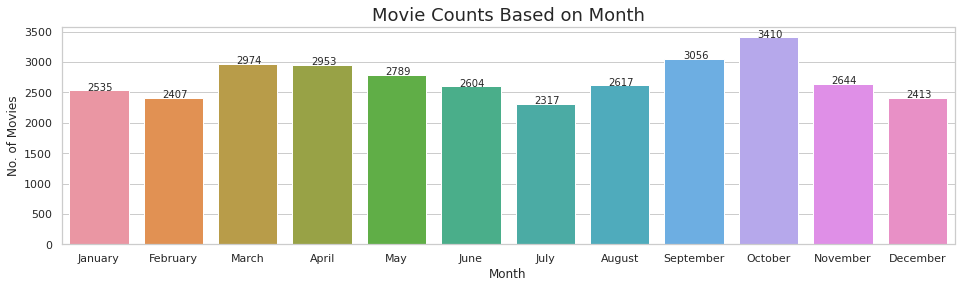

In [20]:
# Visualize movie counts release based on month with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
months_published = movies_published.groupby('month_published')['imdb_title_id'].count().index
count_movies = movies_published.groupby('month_published')['imdb_title_id'].count()
sns.barplot(ax = ax, x = months_published, y = count_movies)
ax.set_title('Movie Counts Based on Month', fontsize = 18)
ax.set_xlabel('Month')
ax.set_ylabel('No. of Movies')
for index,count_movies in enumerate(count_movies):
       ax.text(x=index-0.15 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June'
                    , 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

#### Wordcloud Genre Column


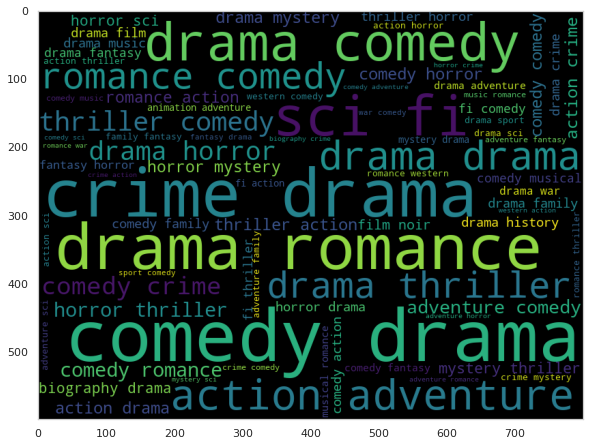

In [21]:
# Create wordcloud on genre column data

comment_words = ''
stop_words = set(STOPWORDS)

for val in imdb_movies['genre']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 600, background_color = 'black'
                      , stopwords = stop_words, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show()

#### Which Genre Has Release Most Movies and Highest Average Vote (Rating)

In [22]:
# Preprocess and split genre column data (because there are more than one genre in each row data)

movies_genre = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'avg_vote']]
movies_genre['genre'] = movies_genre['genre'].astype('str')

genre_split = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
genre_split = genre_split.reset_index(['imdb_title_id'])
genre_split.columns = ['imdb_title_id', 'genre_split']
movies_genre_split = pd.merge(genre_split, movies_genre[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.lstrip(' ').str.rstrip(' ')
movies_genre_split.head()

,imdb_title_id,genre_split,original_title,avg_vote
0,tt0000009,Romance,Miss Jerry,5.9
1,tt0002101,Drama,Cleopatra,5.2
2,tt0002101,History,Cleopatra,5.2
3,tt0002199,Biography,"From the Manger to the Cross; or, Jesus of Naz...",5.7
4,tt0002199,Drama,"From the Manger to the Cross; or, Jesus of Naz...",5.7


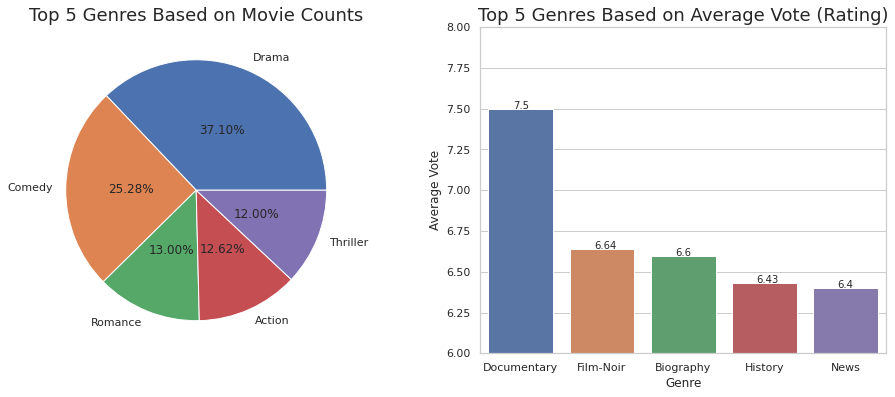

In [23]:
# Visualize top 5 genres based on movie counts and based on average vote (rating)

fig, ax = plt.subplots(1, 2, figsize = (16,6))

genres = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False).index[0:5]
count_movies = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False)[0:5]
ax[0].pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5)
ax[0].set_title('Top 5 Genres Based on Movie Counts', fontsize = 18)

genres = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False).index[0:5]
avg_votes = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False)[0:5]
sns.barplot(ax = ax[1], x = genres, y = avg_votes)
ax[1].set_title('Top 5 Genres Based on Average Vote (Rating)', fontsize = 18)
ax[1].set_xlabel('Genre')
for index,avg_votes in enumerate(round(avg_votes, 2)):
    ax[1].text(x=index-0.1 , y =avg_votes+0 , s=f"{avg_votes}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('Average Vote')
ax[1].set_ylim(6, 8)

plt.show()

#### Which Director Has Release Most Movies and Highest Average Vote (Rating)

In [24]:
# Preprocess and split director column data (because there are more than one director in each row data)

movies_director = imdb_movies[['imdb_title_id', 'original_title', 'director', 'avg_vote']]
movies_director['director'] = movies_director['director'].astype('str')

director_split = pd.DataFrame(movies_director['director'].str.split(',').tolist(), index=movies_director['imdb_title_id']).stack()
director_split = director_split.reset_index(['imdb_title_id'])
director_split.columns = ['imdb_title_id', 'director_split']
movies_director_split = pd.merge(director_split, movies_director[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_director_split['director_split'] = movies_director_split['director_split'].str.lstrip(' ').str.rstrip(' ')
gb_director = movies_director_split.groupby('director_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_director.drop(gb_director[gb_director.index == 'nan'].index, inplace = True)
gb_director.head()

,imdb_title_id,avg_vote
,count,mean
director_split,,
'Evil' Ted Smith,1,4.000
'Philthy' Phil Phillips,1,3.700
A. Blaine Miller,1,5.300
A. Dean Bell,2,4.650
A. Edward Sutherland,25,6.328


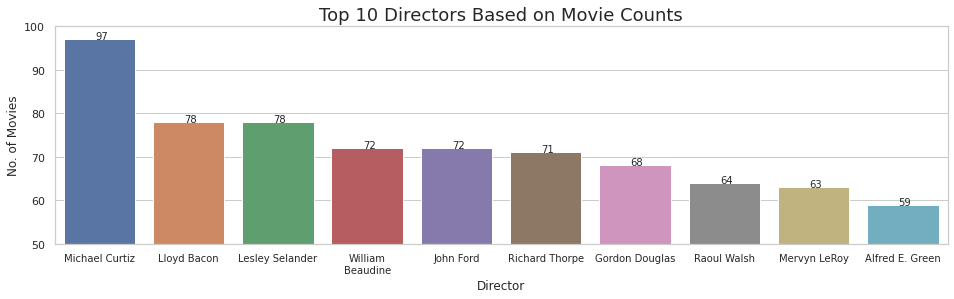

In [25]:
# Visualize top 10 directors based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
directors = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]
sns.barplot(ax = ax, x = directors, y = count_movies)
ax.set_title('Top 10 Directors Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(50, 100)
plt.show()

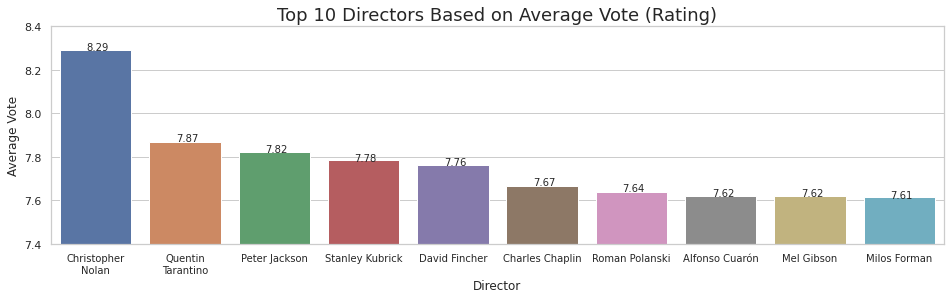

In [26]:
# Visualize top 10 directors based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_director_split.groupby('director_split')['imdb_title_id'].count() >= 5
directors = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = directors, y = avg_vote)
ax.set_title('Top 10 Directors Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7.4, 8.4)
plt.show()

#### Which Writer Has Release Most Movies and Highest Average Vote (Rating)

In [27]:
# Preprocess and split writer column data (because there are more than one writer in each row data)

movies_writer = imdb_movies[['imdb_title_id', 'original_title', 'writer', 'avg_vote']]
movies_writer['writer'] = movies_writer['writer'].astype('str')

writer_split = pd.DataFrame(movies_writer['writer'].str.split(',').tolist(), index=movies_writer['imdb_title_id']).stack()
writer_split = writer_split.reset_index(['imdb_title_id'])
writer_split.columns = ['imdb_title_id', 'writer_split']
movies_writer_split = pd.merge(writer_split, movies_writer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_writer_split['writer_split'] = movies_writer_split['writer_split'].str.lstrip(' ').str.rstrip(' ')
gb_writer = movies_writer_split.groupby('writer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_writer.drop(gb_writer[gb_writer.index == 'nan'].index, inplace = True)
gb_writer.head()

,imdb_title_id,avg_vote
,count,mean
writer_split,,
'A.J.' Marriot,1,7.2
'Evil' Ted Smith,1,4.0
'Weird Al' Yankovic,1,7.0
50 Cent,2,4.6
A. Channing Edington,1,5.7


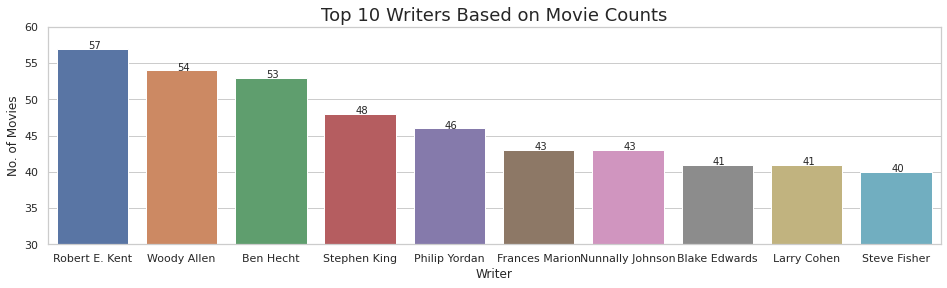

In [28]:
# Visualize top 10 writers based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

writers = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_writer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = count_movies)
ax.set_title('Top 10 Writers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Writer')
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(30, 60)
plt.show()

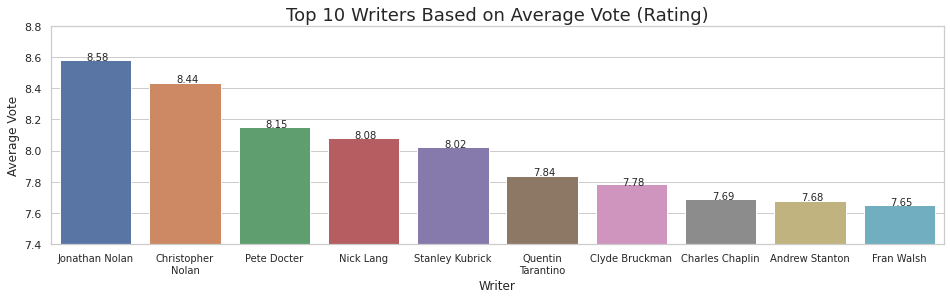

In [29]:
# Visualize top 10 writers based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have write 5 movies
mask = movies_writer_split.groupby('writer_split')['imdb_title_id'].count() >= 5
writers = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_writer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = writers, y = avg_vote)
ax.set_title('Top 10 Writers Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Writer')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7.4, 8.8)
plt.show()

#### Which Production Company Has Release Most Movies and Highest Average Vote (Rating)

In [30]:
# Preprocess production company column data

movies_productioncomp = imdb_movies[['imdb_title_id', 'original_title', 'production_company', 'avg_vote']]
movies_productioncomp['production_company'] = movies_productioncomp['production_company'].astype('str')

gb_productioncomp = movies_productioncomp.groupby('production_company').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_productioncomp.drop((gb_productioncomp[gb_productioncomp.index == ''].index) | (gb_productioncomp[gb_productioncomp.index == 'nan'].index), inplace = True)
gb_productioncomp.head()

,imdb_title_id,avg_vote
,count,mean
production_company,,
"""DIA"" Productions GmbH & Co. KG",1,6.1
"""Pempti & 12"" Tsaltabasis-Xenopoulos",1,6.0
#Sinning Works,2,4.0
'Am I Wrong?' Productions,1,4.5
.406 Production,1,6.9


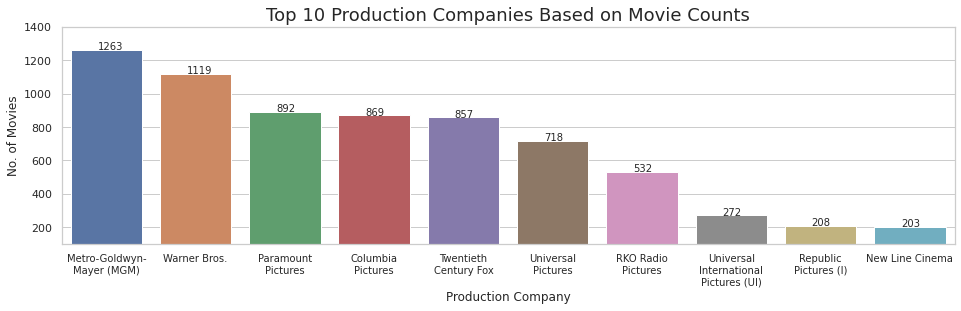

In [31]:
# Visualize top 10 production companies based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

productioncomp = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = count_movies)
ax.set_title('Top 10 Production Companies Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0.6 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(100, 1400)
plt.show()

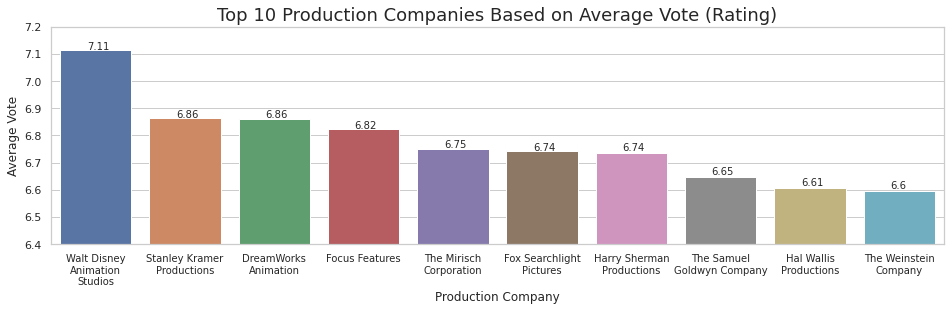

In [32]:
# Visualize top 10 production companies based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have produce 20 movies
mask = movies_productioncomp.groupby('production_company')['imdb_title_id'].count() >= 20
productioncomp = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = avg_vote)
ax.set_title('Top 10 Production Companies Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(6.4, 7.2)
plt.show()

#### Which Actor Has Release Most Movies and Highest Average Vote (Rating)

In [33]:
# Preprocess and split actor column data (because there are more than one actor in each row data)

movies_actor = imdb_movies[['imdb_title_id', 'original_title', 'actors', 'avg_vote']]
movies_actor['actors'] = movies_actor['actors'].astype('str')

actor_split = pd.DataFrame(movies_actor['actors'].str.split(',').tolist(), index=movies_actor['imdb_title_id']).stack()
actor_split = actor_split.reset_index(['imdb_title_id'])
actor_split.columns = ['imdb_title_id', 'actor_split']
movies_actor_split = pd.merge(actor_split, movies_actor[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_actor_split['actor_split'] = movies_actor_split['actor_split'].str.lstrip(' ').str.rstrip(' ')
gb_actor = movies_actor_split.groupby('actor_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_actor.drop((gb_actor[gb_actor.index == 'nan'].index), inplace = True)
gb_actor.head()

,imdb_title_id,avg_vote
,count,mean
actor_split,,
'Baby' Carmen De Rue,3,5.166667
'Big Al' Solomon,1,3.400000
'Big Jack' Provan,1,6.000000
'Big Walter' Price,1,5.800000
'Big' Jack Little,1,4.300000


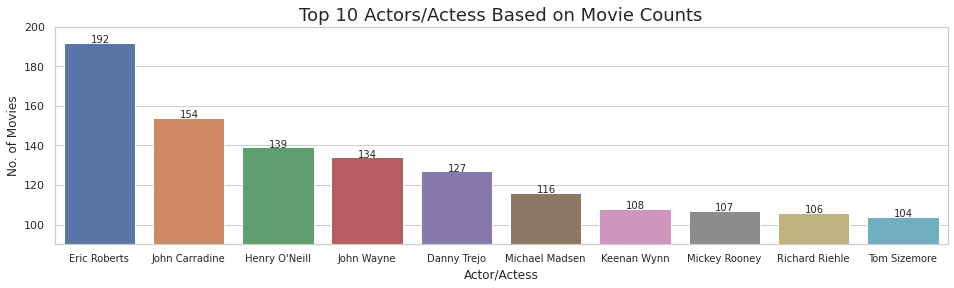

In [34]:
# Visualize top 10 actors based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

actor = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = count_movies)
ax.set_title('Top 10 Actors/Actess Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(90, 200)
plt.show()

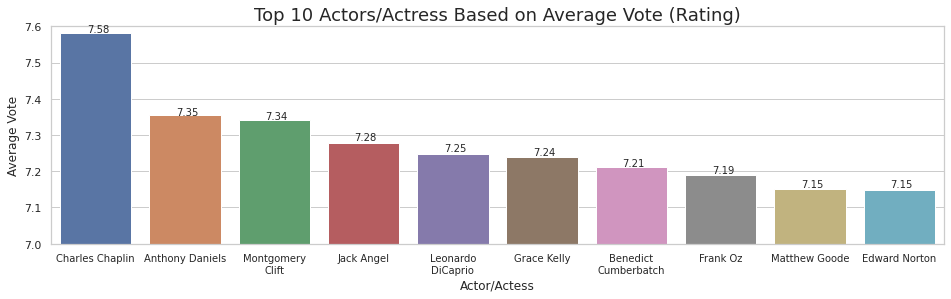

In [35]:
# Visualize top 10 actors based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have become an actor/actress on 10 movies
mask = movies_actor_split.groupby('actor_split')['imdb_title_id'].count() >= 10
actor = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = avg_vote)
ax.set_title('Top 10 Actors/Actress Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7, 7.6)
plt.show()

#### Which Cinematographer Has Release Most Movies and Highest Average Vote (Rating)

In [36]:
# Preprocess and split cinematographer column data (because there are more than one cinematographer in each row data)

movies_cinematographer = imdb_movies[['imdb_title_id', 'original_title', 'cinematographer', 'avg_vote']]
movies_cinematographer['cinematographer'] = movies_cinematographer['cinematographer'].astype('str')

cinematographer_split = pd.DataFrame(movies_cinematographer['cinematographer'].str.split(',').tolist(), index=movies_cinematographer['imdb_title_id']).stack()
cinematographer_split = cinematographer_split.reset_index(['imdb_title_id'])
cinematographer_split.columns = ['imdb_title_id', 'cinematographer_split']

movies_cinematographer_split = pd.merge(cinematographer_split, movies_cinematographer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_cinematographer_split['cinematographer_split'] = movies_cinematographer_split['cinematographer_split'].str.lstrip(' ').str.rstrip(' ')
gb_cinematographer = movies_cinematographer_split.groupby('cinematographer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_cinematographer.drop((gb_cinematographer[gb_cinematographer.index == 'nan'].index), inplace = True)
gb_cinematographer.head()

,imdb_title_id,avg_vote
,count,mean
cinematographer_split,,
A. Todd Smith,1,5.80
A. Troy Thomas,1,6.70
A.J. Fitzpatrick,1,3.40
A.J. Raitano,5,5.14
A.K. Rosencrans,1,4.10


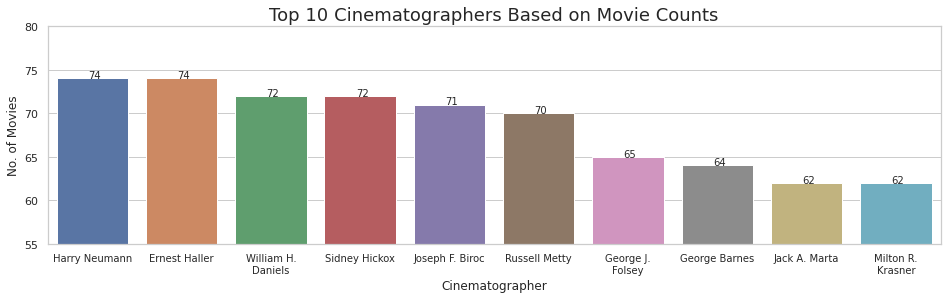

In [37]:
# Visualize top 10 cinematographer based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

cinematographer = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = cinematographer, y = count_movies)
ax.set_title('Top 10 Cinematographers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Cinematographer')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(round(count_movies, 2)):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(55, 80)
plt.show()

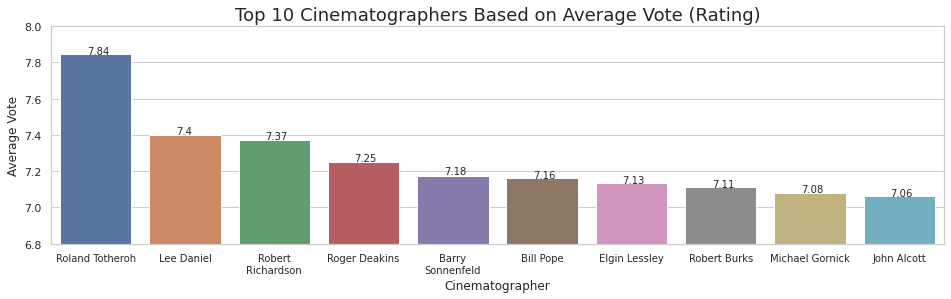

In [38]:
# Visualize top 10 actors based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_cinematographer_split.groupby('cinematographer_split')['imdb_title_id'].count() >= 5
cinematographer = gb_cinematographer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_cinematographer.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = cinematographer, y = avg_vote)
ax.set_title('Top 10 Cinematographers Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Cinematographer')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(6.8, 8)
plt.show()

# Recommender System Based on Content

In [39]:
# Features that used in this recommender system is 'original_title' (as index),  'genre', 'director', 'actors', 'description'
data_recsys=imdb_movies[['original_title', 'genre', 'director', 'actors', 'description']].reset_index(drop = True)
data_recsys.head()

,original_title,genre,director,actors,description
0,Miss Jerry,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.
1,Cleopatra,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
2,"From the Manger to the Cross; or, Jesus of Naz...","Biography, Drama",Sidney Olcott,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ..."
3,Richard III,Drama,"André Calmettes, James Keane","Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...
4,"Home, Sweet Home",Drama,D.W. Griffith,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...


In [40]:
# Preprocess the data

data_recsys.set_index('original_title', inplace = True)

data_recsys['genre'] = data_recsys['genre'].fillna('').astype('str').str.lower()
data_recsys['genre'] = data_recsys['genre'].str.split(',')

data_recsys['director'] = data_recsys['director'].fillna('').astype('str').str.lower()
data_recsys['director'] = data_recsys['director'].str.split(',')

data_recsys['actors'] = data_recsys['actors'].fillna('').astype('str').str.lower()
data_recsys['actors'] = data_recsys['actors'].str.split(',')

In [41]:
# Preprocess description column data

data_recsys['description'] = data_recsys['description'].fillna('').astype('str').str.lower()
data_recsys['description'] = data_recsys['description'].str.translate(str.maketrans('', '', string.punctuation))

#from nltk.corpus import stopwords
listStopwords = set(stopwords.words('english'))
filtered = []
ps = PorterStemmer() 
for i, text in enumerate(data_recsys['description'].str.split()):
    for word in text:
        # Filtering/Removing stopwords in the text
        if word not in listStopwords:
            # Stemming words
            word_stemmed = ps.stem(word)
            filtered.append(word_stemmed)
    data_recsys['description'][i] = filtered
    filtered = []

In [42]:
# Create new column 'bunch_of_words' that contains words taken from all features columns

data_recsys['bunch_of_words'] = ''
for i, text in data_recsys.iterrows():
    words = ''
    for col in data_recsys.columns:
        words = words + ' '.join(text[col]) + ' '
    data_recsys['bunch_of_words'][i] = words

In [43]:
data_recsys.head()

,genre,director,actors,description,bunch_of_words
original_title,,,,,
Miss Jerry,[romance],[alexander black],"[blanche bayliss, william courtenay, chaunce...","[adventur, femal, report, 1890]",romance alexander black blanche bayliss willi...
Cleopatra,"[drama, history]",[charles l. gaskill],"[helen gardner, pearl sindelar, miss fieldin...","[fabl, queen, egypt, affair, roman, gener, mar...",biography drama history joseph l. mankiewicz...
"From the Manger to the Cross; or, Jesus of Nazareth","[biography, drama]",[sidney olcott],"[r. henderson bland, percy dyer, gene gaunti...","[account, life, jesu, christ, base, book, new,...",biography drama sidney olcott r. henderson bl...
Richard III,[drama],"[andré calmettes, james keane]","[robert gemp, frederick warde, albert gardne...","[richard, gloucest, use, manipul, murder, gain...",drama andré calmettes james keane robert gemp...
"Home, Sweet Home",[drama],[d.w. griffith],"[henry b. walthall, josephine crowell, lilli...","[john, howard, payn, miser, point, life, write...",drama d.w. griffith henry b. walthall josephi...


In [44]:
# Convert a collection of text documents to a vector of term/token counts (CountVectorizer)

count = CountVectorizer()
count_matrix = count.fit_transform(data_recsys['bunch_of_words']).astype(np.uint8)

In [45]:
# To reduce memory usage
del data_imdb_names
del data_imdb_title_principals

In [46]:
# Calculate Cosine Similarity
# Cosine similarity is a metric used to measure how similar the documents are irrespective of their size

chunk_size = 500 
matrix_len = count_matrix.shape[0] # Not sparse numpy.ndarray

# Calculate cosine similarity chunk by chunk
def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=count_matrix[start:end], Y=count_matrix)
cosine_similarity_all = []
i=0
for chunk_start in range(0, matrix_len, chunk_size):
    
    # Initialize first cosine sim chunk (for first concatenating chunks purpose)
    if i == 0: 
        cosine_sim = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    
    # Initialize other cosine sim chunk, then concatenating chunk by chunk untill all chunks concatenated
    else :
        cosine_similarity_chunk= similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
        # Use type data float32 for reduce memory usage
        cosine_sim = np.concatenate((cosine_sim.astype(np.float32), cosine_similarity_chunk.astype(np.float32)))
    
    # Change value i != 0 for execute else statement, because we dont need execute if statement anymore (if statement only to initialize first chunk for first concatenating purpose)
    i= 1

In [47]:
# Create function that return 10 recommended/similar movies based on input

# Create variable index
index_movies = pd.Series(data_recsys.index)

# Movies Recommendation function
def recommendation_movies(title, cosine_sim = cosine_sim):
    recommended_movies = []
    index_movie_input = index_movies[index_movies == title].index[0]
    score_movies = pd.Series(cosine_sim[index_movie_input]).sort_values(ascending = False)
    top_10_index_movies = list(score_movies.iloc[1:11].index)
    # Get movies title and year by index (top 10 movies)
    for i in top_10_index_movies:
        recommended_movies.append(imdb_movies['original_title'].iloc[i] + ' (' + str(imdb_movies['year'].iloc[i]) + ')')
    return recommended_movies

In [48]:
# Results
recommendation_movies('The Dark Knight')

['Batman Begins (2005)',
 'The Dark Knight Rises (2012)',
 'Batman Returns (1992)',
 "Logan's Run (1976)",
 'Law Abiding Citizen (2009)',
 "Hitman's Run (1999)",
 'Diverted Eden (2020)',
 'Hamburger Hill (1987)',
 'Alexander (2004)',
 'The Prestige (2006)']